In [1]:
import pandas as pd

# Read in the data
df_biden = pd.read_csv('wh_articles_biden_long.csv')
df_obama = pd.read_csv('wh_articles_obama_statement_and_releases_long.csv')
df_trump = pd.read_csv('wh_articles_trump_long.csv')

In [2]:
# Print column names
print(df_biden.columns)
print(df_obama.columns)
print(df_trump.columns)

Index(['date', 'brief_format', 'header', 'url'], dtype='object')
Index(['date', 'brief_format', 'header', 'text', 'url'], dtype='object')
Index(['date', 'brief_format', 'header', 'text', 'url'], dtype='object')


In [3]:
# count the total rows
print('Biden:', len(df_biden))
print('Obama:', len(df_obama))
print('Trump:', len(df_trump))

Biden: 6067
Obama: 11747
Trump: 6486


In [4]:
print('Obama:', len(df_obama[df_obama['header'].str.contains('Biden')]))
print('Biden:', len(df_biden[df_biden['header'].str.contains('Harris')]))
print('Trump:', len(df_trump[df_trump['header'].str.contains('Pence')]))


Obama: 851
Biden: 786
Trump: 732


In [5]:
df = df_biden[df_biden['header'].str.contains('Harris')]
df.to_csv('harris.csv')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df_biden['year'] = df_biden['date'].str[:4]
df_biden = df_biden[df_biden['year'].isin(['2021', '2022'])]

time = df_biden['year'].unique()
time.sort()

mentions_biden = df_biden[df_biden['header'].str.contains('Harris')]
mentions_biden = mentions_biden.groupby('year').count()['header']
mentions_biden = mentions_biden / df_biden.groupby('year').count()['header']


In [7]:
df_obama['year'] = df_obama['date'].str[-4:]
time = df_obama['year'].unique()
time.sort()

mentions_obama = df_obama[df_obama['header'].str.contains('Biden')]
mentions_obama = mentions_obama.groupby('year').count()['header']
mentions_obama = mentions_obama / df_obama.groupby('year').count()['header']

In [8]:
df_trump['year'] = df_trump['date'].str[-4:]
time = df_trump['year'].unique()
time.sort()
mentions_trump = df_trump[df_trump['header'].str.contains('Pence')]
mentions_trump = mentions_trump.groupby('year').count()['header']
mentions_trump = mentions_trump / df_trump.groupby('year').count()['header']

In [9]:
mentions_obama = pd.DataFrame(mentions_obama)
mentions_obama['president'] = 'Obama'
mentions_obama.columns = ['mentions', 'president']
mentions_obama = mentions_obama.reset_index()
mentions_obama['year'] = mentions_obama['year'].replace({'2009': 'First Year', '2010': 'Second Year', '2011': 'Third Year', '2012': 'Fourth Year', '2013': 'Fifth Year', '2014': 'Sixth Year', '2015': 'Seventh Year', '2016': 'Eighth Year', '2017': 'Ninth Year'})
mentions_obama = mentions_obama.sort_values(by=['year'])

mentions_biden = pd.DataFrame(mentions_biden)
mentions_biden['president'] = 'Biden'
mentions_biden.columns = ['mentions', 'president']
mentions_biden = mentions_biden.reset_index()
mentions_biden['year'] = mentions_biden['year'].replace({'2021': 'First Year', '2022': 'Second Year'})
mentions_biden = mentions_biden.sort_values(by=['year'])

mentions_trump = pd.DataFrame(mentions_trump)
mentions_trump['president'] = 'Trump'
mentions_trump.columns = ['mentions', 'president']
mentions_trump = mentions_trump.reset_index()
mentions_trump['year'] = mentions_trump['year'].replace({'2017': 'First Year', '2018': 'Second Year', '2019': 'Third Year', '2020': 'Fourth Year', '2021': 'Fifth Year'})
mentions_trump = mentions_trump.sort_values(by=['year'])

df = pd.concat([mentions_obama, mentions_trump, mentions_biden])

In [10]:
df['index'] = df['year'].replace({'First Year': 1, 'Second Year': 2, 'Third Year': 3, 'Fourth Year': 4, 'Fifth Year': 5, 'Sixth Year': 6, 'Seventh Year': 7, 'Eighth Year': 8, 'Ninth Year': 9})
df = df.sort_values(by=['index'])

C:\Users\phili\AppData\Local\Temp\ipykernel_5464\3212671442.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


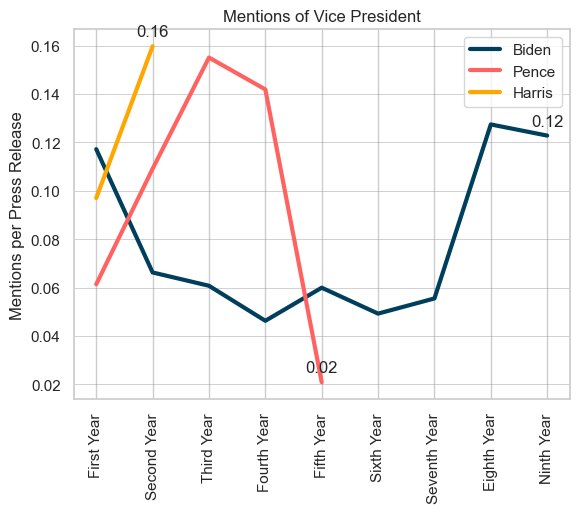

In [45]:
#plot df
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x='year', y='mentions', hue='president', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Mentions of Vice President')
plt.ylabel('Mentions per Press Release')
ax.lines[0].set_color("#003f5c")
ax.lines[1].set_color("#ff6361")
ax.lines[2].set_color("#ffa600")
ax.lines[0].set_linewidth(3)
ax.lines[1].set_linewidth(3)
ax.lines[2].set_linewidth(3)
ax.legend(loc='best', bbox_to_anchor=(1, 1), ncol=1)
ax.legend_.get_lines()[0].set_linewidth(3)
ax.legend_.get_lines()[1].set_linewidth(3)
ax.legend_.get_lines()[2].set_linewidth(3)
ax.legend_.get_lines()[0].set_color("#003f5c")
ax.legend_.get_lines()[1].set_color("#ff6361")
ax.legend_.get_lines()[2].set_color("#ffa600")
ax.legend_.get_texts()[0].set_text('Biden')
ax.legend_.get_texts()[1].set_text('Pence')
ax.legend_.get_texts()[2].set_text('Harris')
ax.set_xlabel('')
ax.grid(True, axis='y', color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
for i, line in enumerate(ax.lines):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    ax.annotate('%.2f' % y, xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
    if int(i) == 2:
        break
plt.show()